<a href="https://colab.research.google.com/github/prakhartiwari10/Colab-Notebooks/blob/main/Pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Computer vision libraries in PYtorch
`torchvision` - contains, datasets, model architecture and image transformations for vision.

`torchvision.datasets` - contains many datasets and series of base classes for making custom datasets.

`torchvision.models` - contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems..

`torchvision.transforms` - Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

`torch.utils.data.Dataset` - Base dataset class for Pytorch

`torch.utils.data.Dataloader` - Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 1. Getting a dataset

In [ ]:
train_data = datasets.FashionMNIST(root="data", # where to download data to
                                   train= True, # is this training data or not
                                   download= True, # download data if it doesn't exist in disk
                                   transform=ToTensor(),
                                   target_transform=None # Transform target(or label) as well
                                   )
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 11962407.83it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201712.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3776469.72it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6202894.86it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image, label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data), len(train_data.targets), len(test_data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

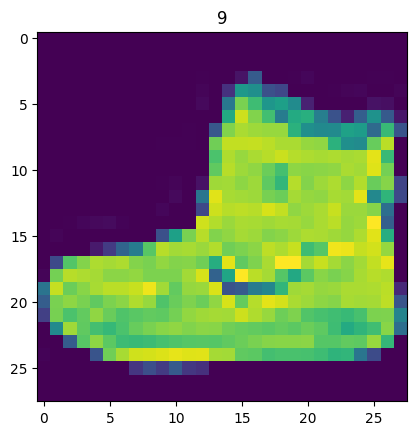

In [ ]:
#plt.imshow(image) # does't run due to invalid shape
# we will squeeze the image to
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

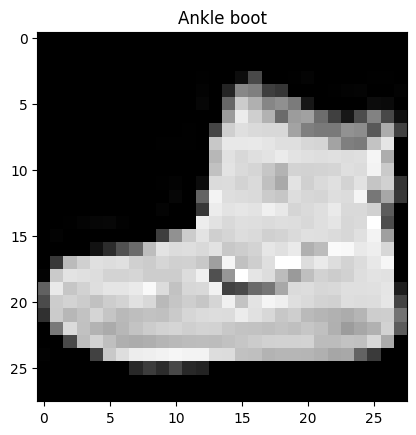

In [ ]:
# convert into grayscale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

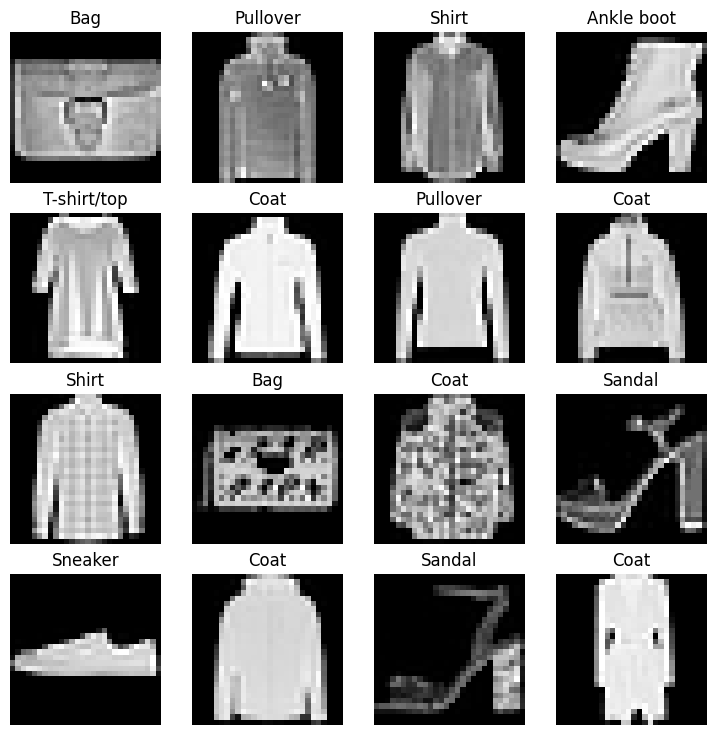

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(1, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

# 2. Prepare Dataloader
`torch.utils.DataLoader` - turns large dataset into a python iterable of small chunks

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle= True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f0d840a2fb0>, <torch.utils.data.dataloader.DataLoader object at 0x7f0d840a27d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Label: 6, label size: torch.Size([])


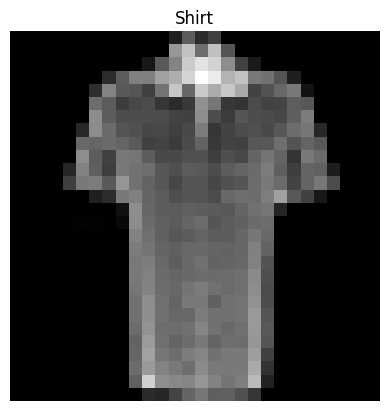

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Label: {label}, label size: {label.shape}")

# 3. Build a Baseline Model

In [ ]:
# Flatten model in nn
Flatten_model = nn.Flatten()
# Get a single example
x = train_features_batch[0]
output = Flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flatterning; {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flatterning; torch.Size([1, 784])


In [ ]:
# Flatten model converted our pixel data from width and height dimensions into one long feature vector so that that can be fed into nn.Linear
# because nn.Linear takes input in the form of feature vector

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(784, 10, len(class_names))
model_0.to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as file:
    file.write(request.content)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end:float, device: torch.device = None):
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm


torch.manual_seed(42)
train_time_start_on_cpu = timer()


epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)


        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)


    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:

            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)


            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))


        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)


    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 36.740 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model_0(X)
      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y, y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return{"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
           "model acc": acc}

model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model acc': 83.42651757188499}

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6: Model-1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f}| Train accuracy: {train_acc:.5f}")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train Loss: 1.09199| Train accuracy: 61.34333
Test loss: 0.95636 | Test Accuracy: 64.99601
Train Loss: 0.78101| Train accuracy: 71.92833
Test loss: 0.72227 | Test Accuracy: 73.91174
Train Loss: 0.67027| Train accuracy: 75.93667
Test loss: 0.68500 | Test Accuracy: 75.01997
Train time on cuda: 37.773 seconds


**Note** - Since the data and model both are smaller, the GPU can sometimes take longer even than cpu because the benifits of using GPU are outweighed by the time it takes to transfer the data there.
There's a small bottleneck between copying data from the CPU memory to the GPU

In [ ]:
# since the eval_model() function that we made before is not device agnostic, it wouldn't work in this case because of model and data being in different devices
# so we have to make a new eval_model function
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device : torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

Adding non-linearity made it perform worse than baseline, from the looks of it, it seems like the model is overfitting(I don't think so though this is the authors' saying)

Two of the main to fix overfitting include:

*Using a smaller or different model (some models fit certain kinds of data better than others).

*Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).


#7. Model - 2: Building a Convulutional Neural Network (CNN)
We're gonna be using TinyVGG model from the CNN Explainer website

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape
    ))

  def forward(self,x):
    x = self.conv_block_1(x)
    x=self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 7.1 Understanding nn.Conv2d() layer
Using toy dataset we'll see how convulation layer works if we change the parameters

In [ ]:
torch.manual_seed(42)
#random images of the same size
images = torch.randn(size=(32, 3, 64, 64))
test_image=images[0]
print(images.shape, test_image.shape)

torch.Size([32, 3, 64, 64]) torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer(test_image).shape # if we add padding of 1, the shape will be same, 64, 64 but this padding reduced the image by two pixels on each dimension because kernel size was 3

torch.Size([10, 62, 62])

In [ ]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=5,
                       stride=1,
                       padding=0)
conv_layer_2(test_image).shape

torch.Size([10, 60, 60])

In [ ]:
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     

In [ ]:
print(conv_layer_2.weight.shape)
print(conv_layer_2.bias.shape)

torch.Size([10, 3, 5, 5])
torch.Size([10])


## 7.2Stepping through nn.MaxPool2d() layer

In [ ]:
max_pool_layer = nn.MaxPool2d(2)
test_image_through_max_pool_layer = max_pool_layer(test_image)
test_image_through_conv_layer_2 = conv_layer_2(test_image)
test_image_through_conv_layer_2_and_max_pool_layer = max_pool_layer(test_image_through_conv_layer_2)
print(test_image_through_max_pool_layer.shape, test_image_through_conv_layer_2.shape, test_image_through_conv_layer_2_and_max_pool_layer.shape)

torch.Size([3, 32, 32]) torch.Size([10, 60, 60]) torch.Size([10, 30, 30])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.59145| Train accuracy: 78.56833
Test loss: 0.40281 | Test Accuracy: 85.49321
Epoch: 1
---------
Train Loss: 0.36529| Train accuracy: 86.87167
Test loss: 0.34648 | Test Accuracy: 87.05072
Epoch: 2
---------
Train Loss: 0.32616| Train accuracy: 88.13333
Test loss: 0.32874 | Test Accuracy: 88.22883
Train time on cuda: 35.627 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3287402391433716,
 'model_acc': 88.22883386581469}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model acc,model_acc
0,FashionMNISTModelV0,0.476639,83.426518,NaN
1,FashionMNISTModelV1,0.685001,NaN,75.019968
2,FashionMNISTModelV2,0.328740,NaN,88.228834


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model acc,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,NaN,36.740303
1,FashionMNISTModelV1,0.685001,NaN,75.019968,37.772672
2,FashionMNISTModelV2,0.328740,NaN,88.228834,35.627127


## Performance-Speed tradeoff
Something to be aware of in machine learning is the performance-speed tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with model_2).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

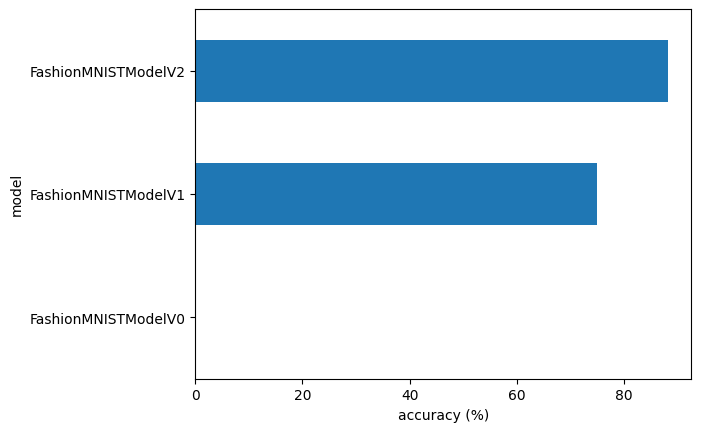

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logit=model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

  test_samples[0].shape

Text(0.5, 1.0, 'Sandal')

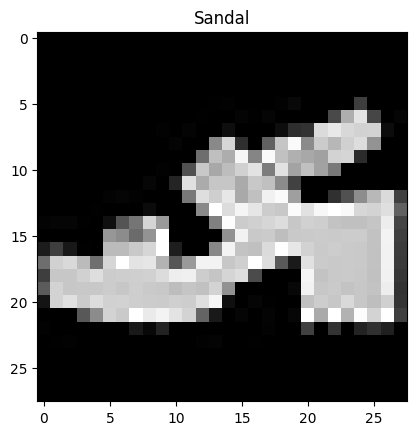

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[3.6072e-07, 1.2192e-08, 2.2807e-08, 5.4560e-07, 2.2749e-08, 9.9991e-01,
         2.6375e-07, 2.3292e-05, 3.7346e-05, 2.4667e-05],
        [5.4344e-02, 4.8805e-01, 2.3857e-03, 1.2288e-01, 5.1546e-02, 2.7742e-04,
         2.7777e-01, 1.6373e-03, 4.4091e-04, 6.6164e-04]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]